<a href="https://colab.research.google.com/github/Ayman-analyst/Sales-Insights-Forecasting-Analysis/blob/main/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load the Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aymanmahmoud","key":"32b46b0f552d2857e4d3edf37b99f7eb"}'}

In [ ]:
import os
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d rohitsahoo/sales-forecasting

Dataset URL: https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting
License(s): GPL-2.0
sales-forecasting.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip sales-forecasting.zip -d sales-forecasting

Archive:  sales-forecasting.zip
replace sales-forecasting/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import os
print(os.listdir("sales-forecasting"))

['train.csv']


In [ ]:
df = pd.read_csv("sales-forecasting/train.csv")

# **Take a look at the dataset**

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
df.describe().T             # T for numerical columns

,count,mean,std,min,25%,50%,75%,max
Row ID,9800.0,4900.500000,2829.160653,1.000,2450.750,4900.50,7350.250,9800.00
Postal Code,9789.0,55273.322403,32041.223413,1040.000,23223.000,58103.00,90008.000,99301.00
Sales,9800.0,230.769059,626.651875,0.444,17.248,54.49,210.605,22638.48


In [ ]:
df.describe(include = "O")        # O for categorical columns

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800
unique,4922,1230,1326,4,793,793,3,1,529,49,4,1861,3,17,1849
top,CA-2018-100111,05/09/2017,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,34,5859,35,35,5101,9800,891,1946,3140,19,5909,1492,47


In [ ]:
df["Ship Mode"].unique()          # unique values in Ship Mode column

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [ ]:
df.columns.to_list()
# Reasons
# 1️⃣ Looping – Useful when iterating through column names in a loop.
# 2️⃣ Column Selection – Helps in dynamically selecting or renaming columns.

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales']

# **Handling Missing Values**

In [ ]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
df[df["Postal Code"].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [ ]:
df["Postal Code"] = df["Postal Code"].fillna(05401.0)       # Burlington Vermont Postal Code is 05401 From Google Search

In [ ]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,object
Ship Date,object
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [ ]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [ ]:
df["Order Date"] = pd.to_datetime(df["Order Date"], format = '%d/%m/%Y')
#1️⃣ Ensures Consistent Date Format – Converts all date values into a standard format.
#2️⃣ Enables Date-Based Operations – Allows filtering, sorting, and calculations (e.g., finding the difference between dates).

In [ ]:
df["Ship Date"] = pd.to_datetime(df["Ship Date"], format = '%d/%m/%Y')

In [ ]:
df[["Order Date","Ship Date"]].describe().T

,count,mean,min,25%,50%,75%,max
Order Date,9800,2017-05-01 05:13:51.673469440,2015-01-03 00:00:00,2016-05-24 00:00:00,2017-06-26 00:00:00,2018-05-15 00:00:00,2018-12-30 00:00:00
Ship Date,9800,2017-05-05 04:17:52.653061120,2015-01-07 00:00:00,2016-05-27 18:00:00,2017-06-29 00:00:00,2018-05-19 00:00:00,2019-01-05 00:00:00


In [ ]:
df["day_order_date"]   = df["Order Date"].dt.day
df["month_order_date"] = df["Order Date"].dt.month
df["year_order_date"]  = df["Order Date"].dt.year
#✅ Facilitates Time-Based Analysis: Example: Extract all orders from January 2024
#✅ Aggregations & Trends: Find total sales per month/year.

In [ ]:
df["day_ship_date"]    = df["Ship Date"].dt.day
df["month_ship_date"]  = df["Ship Date"].dt.month
df["year_ship_date"]   = df["Ship Date"].dt.year

In [ ]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,day_order_date,month_order_date,year_order_date,day_ship_date,month_ship_date,year_ship_date
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,8,11,2017,11,11,2017
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,8,11,2017,11,11,2017
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,12,6,2017,16,6,2017
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,11,10,2016,18,10,2016
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,11,10,2016,18,10,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,...,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,21,5,2017,28,5,2017
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,12,1,2016,17,1,2016
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,Technology,Phones,GE 30524EE4,235.1880,12,1,2016,17,1,2016
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,12,1,2016,17,1,2016


# **Data Exploration**

# **Ship Mode**

<Axes: xlabel='Ship Mode'>

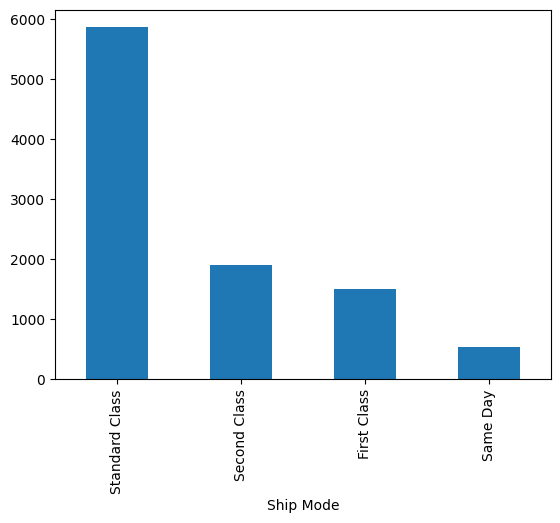

In [ ]:
df["Ship Mode"].value_counts().plot(kind = "bar")

In [ ]:
df["Ship Mode"].value_counts()

,count
Ship Mode,
Standard Class,5859
Second Class,1902
First Class,1501
Same Day,538


In [ ]:
df.groupby(["Ship Mode"])[["Sales"]].sum().sort_values("Sales")

,Sales
Ship Mode,
Same Day,1.252190e+05
First Class,3.455723e+05
Second Class,4.499142e+05
Standard Class,1.340831e+06


In [ ]:
df.groupby(["Ship Mode"])[["Sales"]].mean()

,Sales
Ship Mode,
First Class,230.228020
Same Day,232.749143
Second Class,236.547939
Standard Class,228.849856


# **Segment**

Text(0.5, 1.0, 'Segment Distribution')

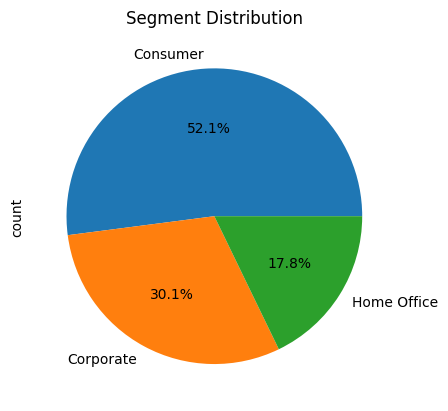

In [ ]:
df["Segment"].value_counts().plot(kind = "pie", autopct = "%1.1f%%")
plt.title("Segment Distribution")

In [ ]:
df["Segment"].value_counts()

,count
Segment,
Consumer,5101
Corporate,2953
Home Office,1746


In [ ]:
df.groupby(["Segment"])[["Sales"]].sum().sort_values("Sales")

,Sales
Segment,
Home Office,4.249822e+05
Corporate,6.884941e+05
Consumer,1.148061e+06


In [ ]:
df.groupby(["Segment"])[["Sales"]].mean()

,Sales
Segment,
Consumer,225.065777
Corporate,233.150720
Home Office,243.403309


# **Data Visualisation**

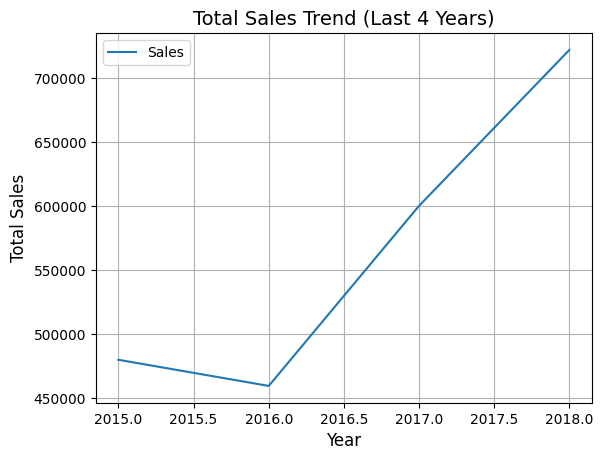

In [ ]:
df.groupby(["year_order_date"])[["Sales"]].sum().sort_values("year_order_date").tail(10).plot(kind= "line")
plt.title("Total Sales Trend (Last 4 Years)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.grid(True)

Text(0, 0.5, 'Sales')

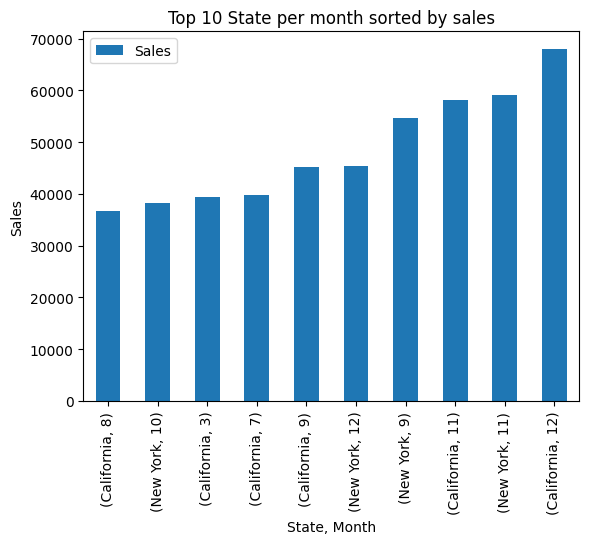

In [ ]:
top_10 = df.groupby(["State","month_ship_date"])[["Sales"]].sum().sort_values("Sales").tail(10)

top_10.plot(kind = "bar")
plt.title("Top 10 State per month sorted by sales")

plt.xlabel("State, Month")
plt.ylabel("Sales")

<ipython-input-90-9f30ee1ba14f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Category", y="Sales", palette="Paired")


<Axes: xlabel='Category', ylabel='Sales'>

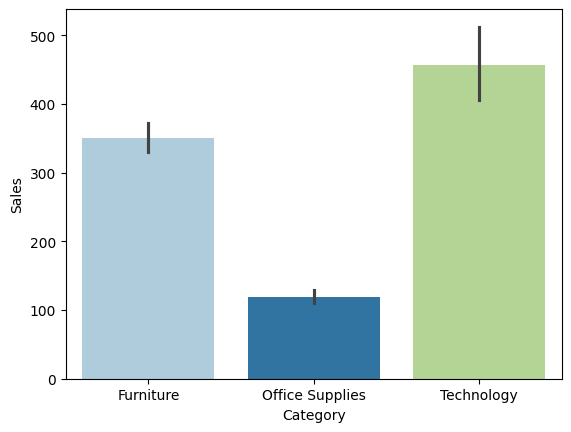

In [ ]:
sns.barplot(data=df, x="Category", y="Sales", palette="Paired")

<Axes: xlabel='Region', ylabel='count'>

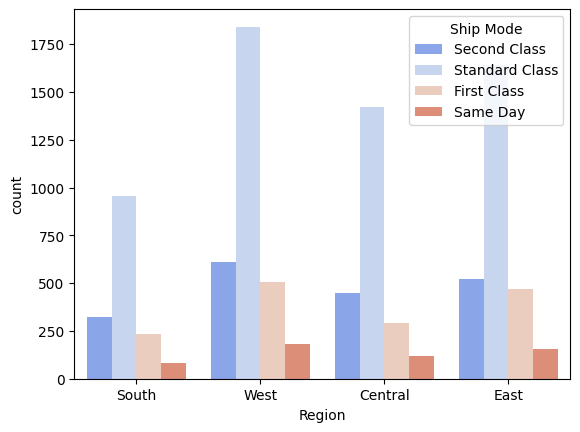

In [ ]:
sns.countplot(x = df["Region"],hue = df["Ship Mode"], palette = "coolwarm")

<ipython-input-92-850660698ec9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = "Sub-Category", palette = "Paired")


Text(0, 0.5, 'Count')

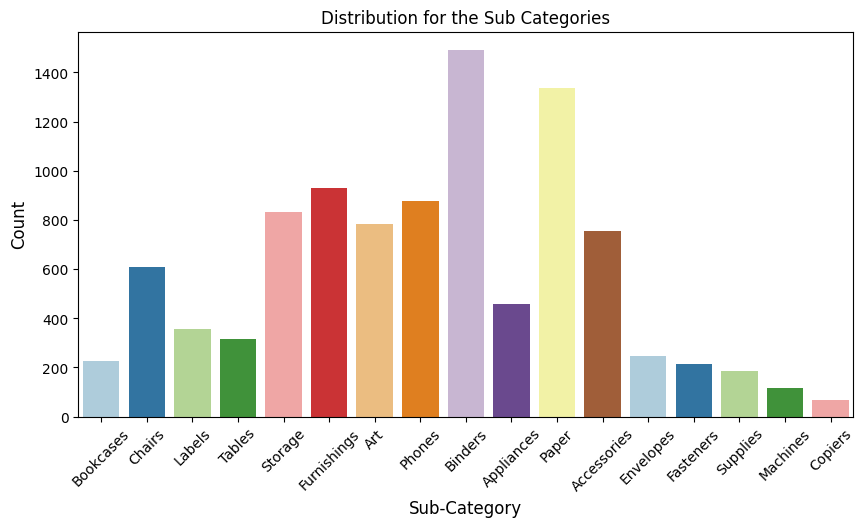

In [ ]:
plt.figure(figsize = (10,5))

sns.countplot(data = df, x = "Sub-Category", palette = "Paired")

plt.xticks(rotation = 45)

plt.title("Distribution for the Sub Categories",fontsize=12)
plt.xlabel("Sub-Category", fontsize=12)
plt.ylabel("Count", fontsize=12)

<ipython-input-94-a33ffcb990ca>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = "Segment", palette = "Set2")


Text(0, 0.5, 'Count')

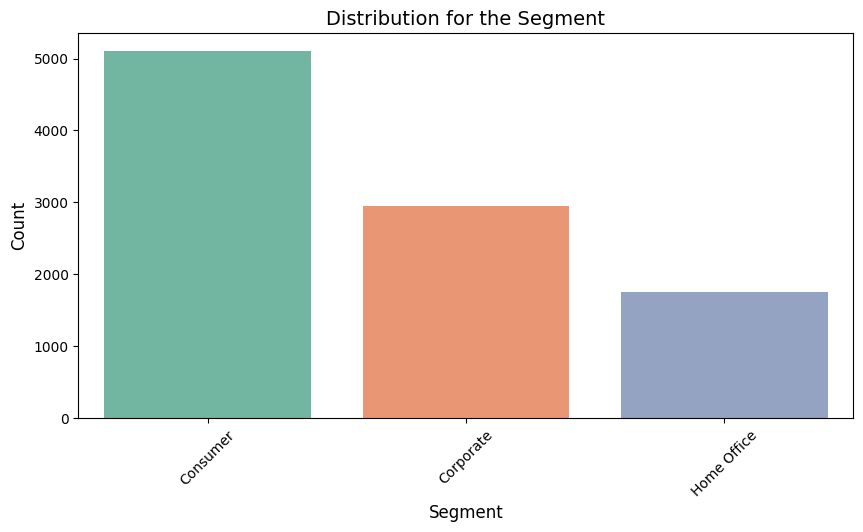

In [ ]:
plt.figure(figsize = (10,5))

sns.countplot(data = df, x = "Segment", palette = "Set2")

plt.xticks(rotation = 45)

plt.title("Distribution for the Segment",fontsize=14)
plt.xlabel("Segment", fontsize=12)
plt.ylabel("Count", fontsize=12)

In [ ]:
fig = px.pie(df, values="Sales", names="Category",
             title="Sales Distribution by Category",
             hole=0.4,  # Creates a donut chart
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textinfo="percent+label")  # Show both labels and percentages
fig.show()


In [ ]:
fig_scatter = px.scatter(df, x='Sub-Category', y='Sales')
fig_scatter.show()

In [ ]:
fig_scatter = px.scatter(df, x="Sub-Category", y="Sales", color="Category")
fig_scatter.show()

<Axes: xlabel='month_order_date', ylabel='Sales'>

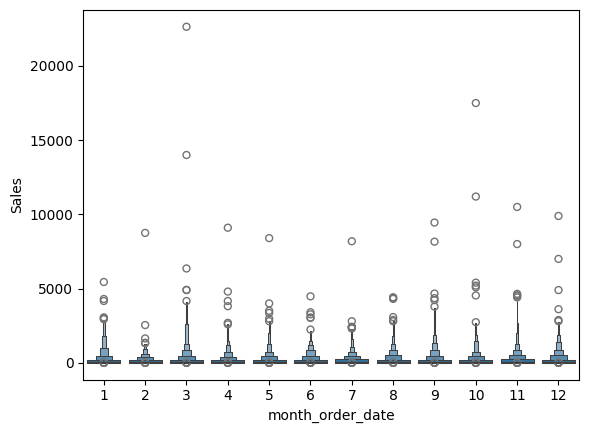

In [ ]:
sns.boxenplot(x= "month_order_date", y = "Sales", data=df)